# This Project serves as the last portfolio project as part of the [Codecademy](https://www.codecademy.com/career-journey/data-scientist-ml) data science: machine learning specialist career path and aims to independently analzye the data from a source called "OKCupid"
--------------------------------
### "The purpose of this project is to practice formulating questions and implementing machine learning techniques to answer those questions. However, the questions you ask and how you answer them are entirely up to you."


## More about the idea:
   > `from the direct Codecademy source` : In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance. In this portfolio project, you will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users.


Althought the dataset revolves around the concept of dating I want to re-direct the vector of attention to to a more general tone thus reframing it into "Recommend a Peer". The usual steps including Data Preprocessing, Exploratory Data Analysis, Machine Learning Model Selection, Evaluation, and Tuning, will be followed. The `Scope` ultimately is to showcase what I learnt throughtout the career path. I also plan to refactor and expand the code to accomodate the concept of pipelines and explore deploying it for a more practical feel further down the line.

To be more specific this project, utilizes machine learning in order to:

    > Group users in order to recognize patterns and filter them (Unspervised Learning)
Then apply that by:

    > Building a recommender system that recommendes a peer based on similarity

## Current Planned Progression:

    1. Exploring the dataset
        1a. Basic Information
        1b. Data Types
        1c. Addressing features (Isolating and Dropping features) 
    2. Data Preprocessing
        2a. Nulls
        2b. Outliers
        2c. Inspecting Data Distibutions
        2e. Formatting Issues
        .. extra
    3. Exploratory Data Analysis
        3a. Understanding the Age distribution
        3b. Eating habits - (relation with body type)
        3c. Usage of Prohibited materials - (affects on health)
        3d. Frequency of Education - (across ages) 
        3e. Frequency of Jobs - (Jobs vs income)
        3f. Frequency and Proportions of Locations 
        3g. Distribution of the activity on the site 
        3h. Is there an association between having pet and a child?
        3i. What languages are spoken?
        
        Then will move on to inspect the variability of features. In addition to encoding all categorical features.

    4. Machine Learning Model
        I plan on using machine learning for:
            >  Grouping Users in order to discover patterns (Unsupervised)
            Then:
            >  Recommend a user based on common attributes 

----------------------------------------------------

    Main topics (holitstic):
        ... Exploring feature relations
        ... Exploring hypothesis tests 
        ... Exploring exploring further associations 
        ... Exploring feature engineering before feeding them into the machine learning models - Filter Methods 
        ... Saving the final model in a format with all hyperparameters needed and weights
        ... Future upgrades and ideas that could be implemented in the future
------------------------------------------------------

### As Always importing initial libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring the Dataset

In [2]:
INDIVIDUALS = pd.read_csv("profiles.csv")
print(f"Overall users : {len(INDIVIDUALS)}")

Overall users : 59946


In [3]:
INDIVIDUALS.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
INDIVIDUALS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

> ### 1- The Datatypes of features refer to the type of data they represent, which determines the type of operations that can be performed on them and the statistical methods applicable to each.

> ### 2- Features' data types are within reason, however, a further inspection is needer to understand the inner values of each feature.

In [5]:
INDIVIDUALS.income.unique()

array([     -1,   80000,   20000,   40000,   30000,   50000,   60000,
       1000000,  150000,  100000,  500000,   70000,  250000], dtype=int64)

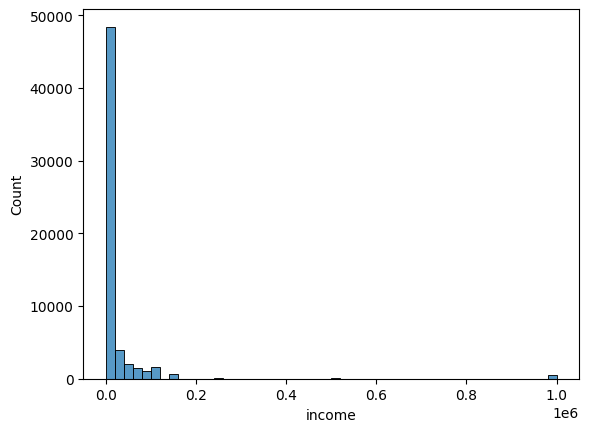

<Figure size 640x480 with 0 Axes>

In [6]:
sns.histplot(INDIVIDUALS.income, bins=50)
plt.plot()
plt.show()
plt.clf()

>### 1-  Pandas (A famous python library for data processing), recorded `int64` for this feature as there are no values with decimals.

>### 2- Note that a value of `-1` has been recorded for many cases. Initially, dealing with that value as a missing value and imputing it is an option but what if people did not share their income on purpose and `-1` was recorder instead?

>### 3- Larger values of income are present in the histplot which also indicates the presence of outliers.

## A very effective way is to look at the dataframe's description (numerice features)

In [7]:
INDIVIDUALS.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


>### A very minimal table yet lengthy description. The income feature statistics aligns with what we looked at there are many `-1` values as percentiles, and a whooping `1000000.000000` value that could skew the income feature. The height feature has a minimum of `1` which does not make any sense.

In [8]:
INDIVIDUALS.height.unique()

array([75., 70., 68., 71., 66., 67., 65., 72., 62., 64., 69., 73., 74.,
       60., 63., 76., 61., 78., 79., 59., 80., 91., 83., 77., 58., 56.,
       95., 57., 87., 81., 36., 43., 52., 55., 53., 93.,  8., 54., 82.,
        3., 86., 42., 84., 94., 50.,  6., 47., 49., 48., 90., 88., nan,
       37.,  9., 51.,  1., 92., 26., 85., 89.,  4.])

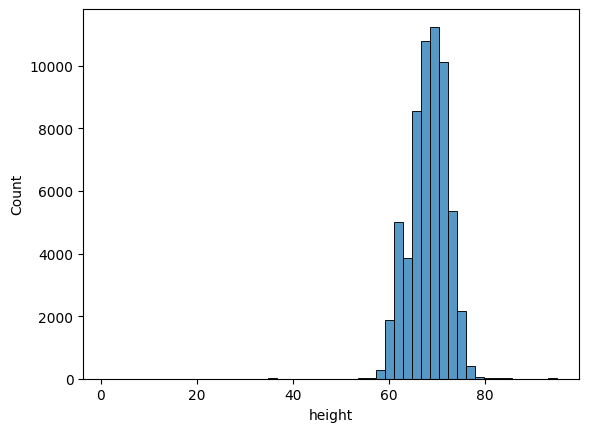

<Figure size 640x480 with 0 Axes>

In [9]:
sns.histplot(INDIVIDUALS.height, bins=50) 
plt.plot()
plt.show()
plt.clf()

>### 1- As seen by both outputs of the .unique() method and the histogram plots, there are values that like the `1.` inch value that may be an input error. Pre-processing will take care of that.

>### 2- The hisplot looks normally distributed.

In [10]:
Ind = INDIVIDUALS.copy() # To not affect the original dataset

In [11]:
Ind.drop(['orientation', 'ethnicity','religion','status','sign'],axis=1,inplace=True)

In [12]:
Ind.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'height', 'income', 'job', 'last_online',
       'location', 'offspring', 'pets', 'sex', 'smokes', 'speaks'],
      dtype='object')

In [13]:
Ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  height       59943 non-null  float64
 17  income       59946 non-null  int64  
 18  job          51748 non-null  object 
 19  last

# Data Preprocessing

## Any missing values?
### In addition to values that could be indicative of a missing/incorrect value in the `income` and `height` fields. It is needed to address NaN (null) values in the dataset

In [14]:
Ind.isna().any()

age            False
body_type       True
diet            True
drinks          True
drugs           True
education       True
essay0          True
essay1          True
essay2          True
essay3          True
essay4          True
essay5          True
essay6          True
essay7          True
essay8          True
essay9          True
height          True
income         False
job             True
last_online    False
location       False
offspring       True
pets            True
sex            False
smokes          True
speaks          True
dtype: bool

In [15]:
Ind.isna().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
pets           19921
sex                0
smokes          5512
speaks            50
dtype: int64

### 1- In terms of categorical features, I will simply replace all null values with an 'Not Shared' to avoid potentially introducing high bias into the dataset. 

### 2- For `height` (A numeric feature), I will remove null observations as they very low in number.

In [16]:
categorical_cols = list(Ind.select_dtypes(include = 'object').columns)
numeric_cols = list(Ind.select_dtypes(include = ['int64','float64']).columns)
Ind[categorical_cols] = Ind[categorical_cols].fillna('Not Shared')

In [17]:
categorical_cols

['body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'job',
 'last_online',
 'location',
 'offspring',
 'pets',
 'sex',
 'smokes',
 'speaks']

In [18]:
numeric_cols

['age', 'height', 'income']

In [19]:
Ind.dropna(subset=['height'],axis=0,inplace=True)

In [20]:
Ind.isna().any()

age            False
body_type      False
diet           False
drinks         False
drugs          False
education      False
essay0         False
essay1         False
essay2         False
essay3         False
essay4         False
essay5         False
essay6         False
essay7         False
essay8         False
essay9         False
height         False
income         False
job            False
last_online    False
location       False
offspring      False
pets           False
sex            False
smokes         False
speaks         False
dtype: bool

# Regarding features

> I plan to Isolate all `essay` variables in one dataframe to expand later on with Natural Language Processing (NLP). (Future Expansion)
    
> I do not plan on using the `orientation`, `ethinicity`, `religion`, `status`, `sign` features in this project. 

In [21]:
essays = Ind[Ind.filter(regex = "essay[0-9]").columns]
essays.columns

Index(['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6',
       'essay7', 'essay8', 'essay9'],
      dtype='object')

In [22]:
Ind = Ind.drop(INDIVIDUALS.filter(regex = "essay[0-9]").columns, axis=1)

### Additionaly I want to check on both `height` and `income` values that were viewed before.

In [23]:
Ind.height.value_counts().sort_index()

height
1.0        1
3.0        1
4.0        1
6.0        1
8.0        1
9.0        1
26.0       1
36.0      11
37.0       2
42.0       1
43.0       2
47.0       1
48.0       2
49.0       1
50.0       2
51.0       1
52.0       1
53.0       5
54.0       3
55.0       6
56.0       8
57.0      17
58.0      53
59.0     212
60.0     791
61.0    1090
62.0    2244
63.0    2767
64.0    3865
65.0    3794
66.0    4759
67.0    5354
68.0    5449
69.0    5179
70.0    6074
71.0    4826
72.0    5315
73.0    2815
74.0    2547
75.0    1382
76.0     783
77.0     280
78.0     132
79.0      57
80.0      27
81.0      11
82.0      11
83.0      12
84.0       9
85.0       1
86.0       1
87.0       1
88.0       2
89.0       1
90.0       1
91.0       3
92.0       1
93.0       1
94.0       3
95.0      20
Name: count, dtype: int64

>### I am under the assumption that very low heights (in inches) are incorrect. I will conclude all heights under 48 inches as erroneous and then inspect distributions later on.

In [24]:
Ind = Ind[Ind.height >= 48.0]

In [25]:
# Once more re-inspecting the unqiue values in income
Ind.income.unique()

array([     -1,   80000,   20000,   40000,   30000,   50000,   60000,
       1000000,  150000,  100000,  500000,   70000,  250000], dtype=int64)

In [26]:
Ind.income.value_counts().sort_index()

income
-1          48422
 20000       2950
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 80000       1110
 100000      1621
 150000       630
 250000       149
 500000        48
 1000000      518
Name: count, dtype: int64

> ### A lot of `-1` values that's for sure. This leads me to believe that this data is not missing at random (MNAR) and many do not like to share important aspects like their income. I will leave it be moving forward.

You could inspect the following [BLOG](https://medium.com/analytics-vidhya/different-types-of-missing-data-59c87c046bf7) for more information on missing types of data. 

# Are there any apparent outliers?

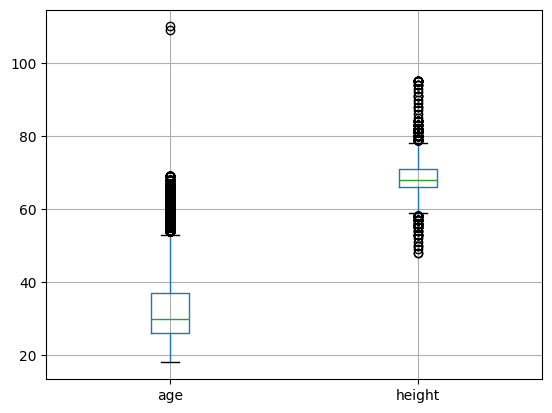

<Figure size 640x480 with 0 Axes>

In [27]:
Ind[[col for col in numeric_cols if col != 'income']].boxplot()
plt.show()
plt.clf()

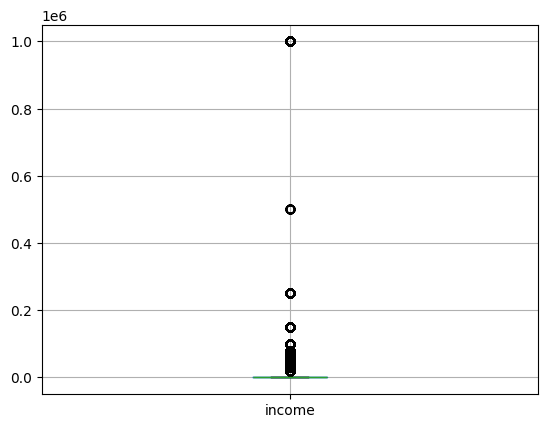

<Figure size 640x480 with 0 Axes>

In [28]:
Ind[['income']].boxplot()
plt.show()
plt.clf()

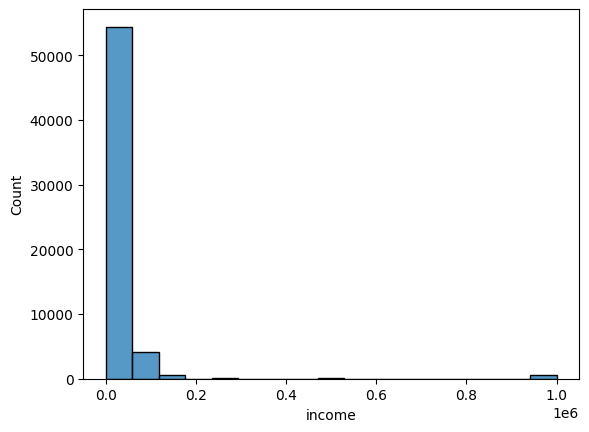

<Figure size 640x480 with 0 Axes>

In [29]:
sns.histplot(Ind.income)
plt.show()
plt.clf()

>### 1- Boxplots and Hisograms can help you eye-catch outliers. I separated `income` from both `age` and `height` as it is in a higher scale (A this early point, we must consider scaling them later on is important)

>### 2- `age` and `income` showcase values that appear to be extreme thus the need to deal with them. A simple way to is to clip those two features then observe the results for further actions. (I may bin income as many values are -1 that indicate that values are not shared)

>### 3- Within the `heights` boxplot, the values (indicated  by black circles) could represent an actual person that is very tall/short so I won't consider limiting this feature further. 

In [30]:
Ind.head()

,age,body_type,diet,drinks,drugs,education,height,income,job,last_online,location,offspring,pets,sex,smokes,speaks
0,22,a little extra,strictly anything,socially,never,working on college/university,75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",likes dogs and likes cats,m,sometimes,english
1,35,average,mostly other,often,sometimes,working on space camp,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",likes dogs and likes cats,m,no,"english (fluently), spanish (poorly), french (..."
2,38,thin,anything,socially,Not Shared,graduated from masters program,68.0,-1,Not Shared,2012-06-27-09-10,"san francisco, california",Not Shared,has cats,m,no,"english, french, c++"
3,23,thin,vegetarian,socially,Not Shared,working on college/university,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,likes cats,m,no,"english, german (poorly)"
4,29,athletic,Not Shared,socially,never,graduated from college/university,66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",Not Shared,likes dogs and likes cats,m,no,english


In [31]:
def cap_outliers(df,cols):
    
    feature_bounds = {}
    for feature in cols:
        Q1 = np.percentile(df[feature],25)
        Q3 = np.percentile(df[feature],75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2 * IQR 
        upper_bound = Q3 + 2 * IQR
        feature_bounds[feature] = (lower_bound,upper_bound)
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]  
    return df, feature_bounds

In [32]:
Ind, feature_bounds = cap_outliers(Ind,['age'])
feature_bounds

{'age': (4.0, 59.0)}

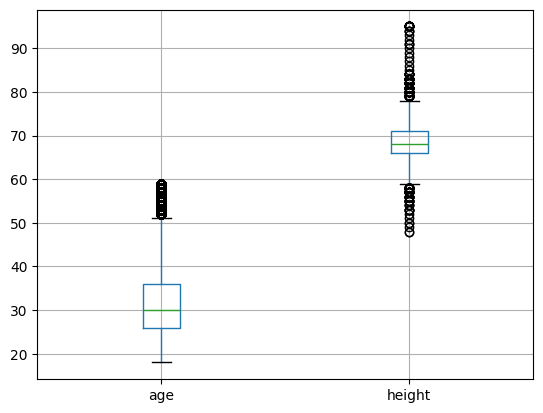

<Figure size 640x480 with 0 Axes>

In [33]:
Ind[[col for col in numeric_cols if col != 'income']].boxplot()
plt.show()
plt.clf()

In [34]:
def bin_income(df):
    df['income_category'] = df.income.apply(lambda x: np.nan if x == -1 else x)

    bins = [0, 50000, 100000, 500000, float(np.inf)]
    labels = ['$0-$50k', '$50k-$100k', '$100k-$500k', '$500k+']

    df['income_category'] = pd.cut(
    df['income'], 
    bins=bins,
    labels=labels,
    right=False)

    df['income_category'] = df['income_category'].astype('object').fillna('Not Shared')


In [35]:
bin_income(Ind)

In [36]:
Ind.income_category.unique()

array(['Not Shared', '$50k-$100k', '$0-$50k', '$500k+', '$100k-$500k'],
      dtype=object)

In [37]:
indices = Ind.income_category.value_counts().index

In [38]:
values = Ind.income_category.value_counts().values

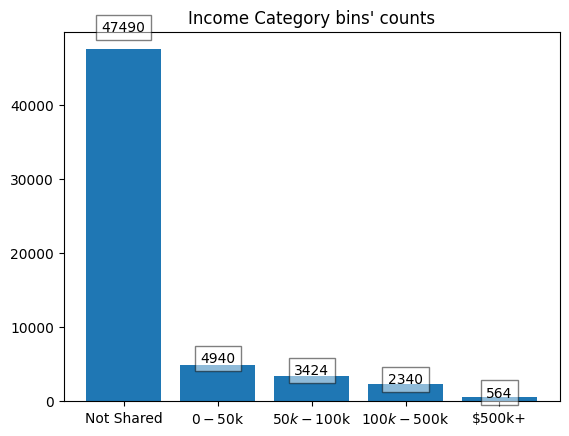

<Figure size 640x480 with 0 Axes>

In [39]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]*1.05,y[i],ha = 'center',bbox = dict(facecolor = 'white', alpha =.5)) # https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/
                                                                                           # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html
plt.bar(x=indices,height=values)
addlabels(x=indices,y=values)
plt.title("Income Category bins' counts")
plt.show()
plt.clf()

> ### I will drop the income column (converted to category bins) and assign it to a new dataframe

In [40]:
# Copying to keep the orignal set as is 
Individuals = Ind.copy()
Individuals = Individuals.drop("income",axis=1)

In [41]:
Individuals.head()

,age,body_type,diet,drinks,drugs,education,height,job,last_online,location,offspring,pets,sex,smokes,speaks,income_category
0,22,a little extra,strictly anything,socially,never,working on college/university,75.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",likes dogs and likes cats,m,sometimes,english,Not Shared
1,35,average,mostly other,often,sometimes,working on space camp,70.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",likes dogs and likes cats,m,no,"english (fluently), spanish (poorly), french (...",$50k-$100k
2,38,thin,anything,socially,Not Shared,graduated from masters program,68.0,Not Shared,2012-06-27-09-10,"san francisco, california",Not Shared,has cats,m,no,"english, french, c++",Not Shared
3,23,thin,vegetarian,socially,Not Shared,working on college/university,71.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,likes cats,m,no,"english, german (poorly)",$0-$50k
4,29,athletic,Not Shared,socially,never,graduated from college/university,66.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",Not Shared,likes dogs and likes cats,m,no,english,Not Shared


In [42]:
Individuals.income_category.unique()

array(['Not Shared', '$50k-$100k', '$0-$50k', '$500k+', '$100k-$500k'],
      dtype=object)

### A pirplot can "create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column."

[seaborn documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

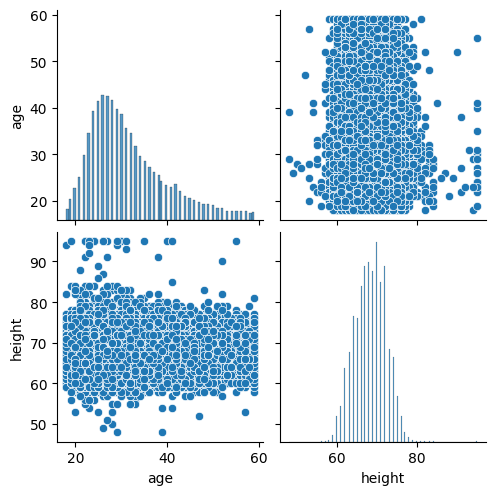

<Figure size 640x480 with 0 Axes>

In [43]:
sns.pairplot(Individuals)
plt.show()
plt.clf()

> ### 1- Looking at the diagonal we could insepct the distributio of both numerical variables
> ### 2- The Height variable as inspected before seems normally distribured
> ### 3- The age variable is somewhat skewed and that could be dealt with via things like applying the log transformation (typically on right-skewed data), normalize our data, or apply machine learning algorithms that do not get affected by outliers to a high degree
> ### 4- The scatter plots does not show any particular trend, but there is a dense population between ages 20 - 30 and heights 60" - 80" as well

# Explartory data Analysis 
Where we explore, inspect, and analyze a dataset to understand characterstics about it.

        3a. Understanding the Age distribution
        3b. Eating habits - (relation with body type)
        3c. Usage of Prohibited materials - (affects on health)
        3d. Frequency of Education - (across ages) 
        3e. Frequency of Jobs - (Jobs vs income)
        3f. Frequency and Proportions of Locations 
        3g. Distribution of the activity on the site 
        3h. Is there an association between having pet and a child?
        3i. What languages are spoken?
        
        Then will move on to inspect the variability of features. In addition to encoding all categorical features.

## Inspecting the age distribution 

The typical age of a user on this site: 32 years old +- 8.460471196377942
The typical age of a user on this site (median): 30 +- 1.0


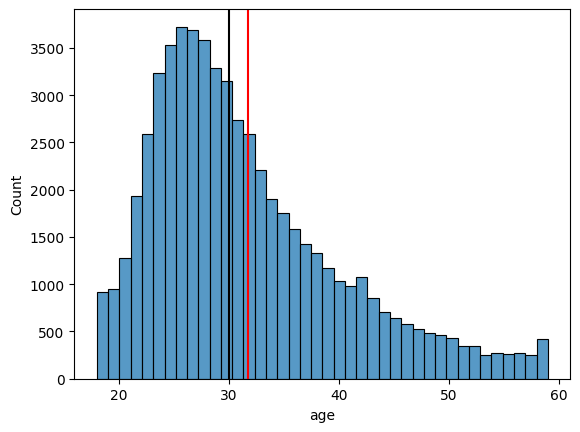

<Figure size 640x480 with 0 Axes>

In [44]:
typical_age = Individuals.age.mean()
median_age = Individuals.age.median() # Less affected by outliers
std = Individuals.age.std()
IQR = np.percentile(Individuals.age,0.75) - np.percentile(Individuals.age,0.25)
print(f"The typical age of a user on this site: {round(typical_age)} years old +- {std}")
print(f"The typical age of a user on this site (median): {round(median_age)} +- {IQR}")
sns.histplot(Individuals.age,bins=40)
plt.axvline(typical_age,color='r')
plt.axvline(median_age,color='black')
plt.show()
plt.clf()

> ### 1- As seen above both the mean (average) and the standard deviation (How far each datapoint is from the mean) can be affected by outliers, thus mentioning the exestince of outliers is needed when reporting. The median value (The value with the most occurance) and the Inter Quantile Range are better options to report as outliers does not affect them to the same degree.

> ### 2- As mentioned previoulsy during pre-processing, the data is somewhat right-skewed. However I do not plan on applying a log transformatio in order to keep the interpretability aspect intact for now.

## What are the frequency of diets adopted across the userbase?
    Does it have any association with the bodytype?

In [45]:
Individuals.diet.value_counts()

diet
Not Shared             23899
mostly anything        16250
anything                6064
strictly anything       5084
mostly vegetarian       3316
mostly other             972
strictly vegetarian      866
vegetarian               662
strictly other           443
mostly vegan             329
other                    319
strictly vegan           227
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    10
Name: count, dtype: int64

In [46]:
Individuals.diet.value_counts(normalize = True)

diet
Not Shared             0.406736
mostly anything        0.276558
anything               0.103203
strictly anything      0.086524
mostly vegetarian      0.056435
mostly other           0.016542
strictly vegetarian    0.014738
vegetarian             0.011267
strictly other         0.007539
mostly vegan           0.005599
other                  0.005429
strictly vegan         0.003863
vegan                  0.002315
mostly kosher          0.001464
mostly halal           0.000817
strictly halal         0.000306
strictly kosher        0.000306
halal                  0.000187
kosher                 0.000170
Name: proportion, dtype: float64

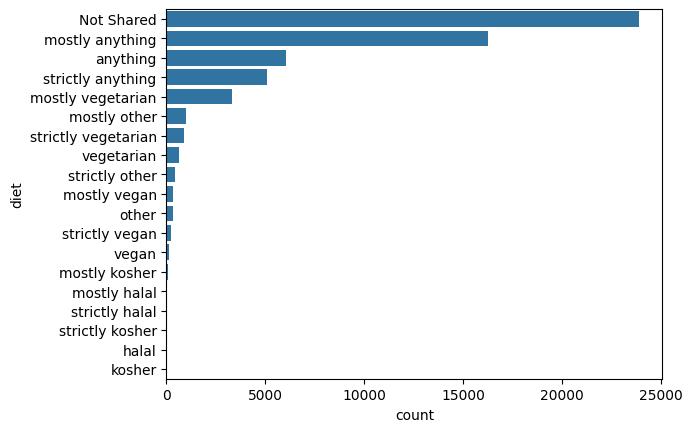

<Figure size 640x480 with 0 Axes>

In [47]:
counts = Individuals.diet.value_counts().sort_values(ascending=False)
columns = Individuals.diet.value_counts().sort_values(ascending=False).index
sns.barplot(x=counts, y=columns)
plt.show()
plt.clf()

> ### An observation noticed is that each type of diet has been split into three restrictions : That diet itself (assuming that it is the lowest contraint), Mostly (Which incorporates the diet for the most part but may allow other diet plans into theirs), Strictly (Will only follow that diet without exceptions)
> ### Other than those who did not wanted to share their private diet habits (my assumption), the highest percentage of users seem to like eating mostly anything allowing for other diet options to potentially take roles in their lifes.

## Question: Does diet have any association with body type?

    > This question tackles the association between diet and bodytype features to see if there are significant associations or not.
    > Since we are analyzing features in a sample and want to generalize results to the population, we rely on hypothesis testing.
    > Both features are categorical so the Hypothesis test appropriate to test our question would the "Chi-square Statistic" Hypothesis test.

We have two hypotheses:

    The Null Hypothesis : There is not a significant association between the diet a person takes and their bodytype.
    The Alternative Hypothesis: There is a significant association between the diet a person takes and their bodytype.

We use the test results to decide whether to reject the null hypothesis or fail to reject it, based on the p-value.

In [48]:
cross_tab_d_body_type = pd.crosstab(Individuals.diet,Individuals.body_type)

In [49]:
cross_tab_d_body_type

body_type,Not Shared,a little extra,athletic,average,curvy,fit,full figured,jacked,overweight,rather not say,skinny,thin,used up
diet,,,,,,,,,,,,,
Not Shared,3717,987,4519,5480,1435,4481,416,134,168,100,701,1681,80
anything,266,272,1290,1630,377,1334,96,28,40,13,182,517,19
halal,1,1,2,2,0,2,0,0,0,0,1,2,0
kosher,1,2,0,0,0,4,0,1,0,0,1,0,1
mostly anything,547,806,3435,4290,1105,3672,279,101,140,47,477,1269,82
mostly halal,2,5,17,8,2,7,0,3,1,0,0,1,2
mostly kosher,4,2,20,16,5,14,5,3,0,2,4,8,3
mostly other,28,50,237,221,85,219,26,15,11,4,20,42,14
mostly vegan,30,13,56,53,24,79,1,3,4,1,16,46,3


> ### The cross tabulation produces a table of frequencies between the two features

chi2_contingency: [chi-square](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)  <-- Link

In [50]:
from scipy.stats import chi2_contingency 

In [51]:
def chi_square(df,feature1,feature2,include_not_shared = True):

    if df[feature1].dtype != "object" or df[feature1].dtype != "object":
        return "Both features need to be categorical"
        
    cross_tab = pd.crosstab(df[feature1],df[feature2])
    if include_not_shared:
        chi2, pval, dof, f = chi2_contingency(cross_tab)
    else:
        cross_tab_NS = pd.crosstab(df[feature1][df[feature1] != "Not Shared"],df[feature2][df[feature2] != "Not Shared"])
        chi2, pval, dof, f = chi2_contingency(cross_tab_NS)
        return cross_tab_NS,chi2,pval
        
    return cross_tab,chi2,pval

In [52]:
# Including not shared in my results to retain secrecy
cross_tab_d_body_type, chi2, pval = chi_square(Individuals,"diet","body_type")

In [53]:
print(F"The probabilty value : {pval}, and chi-square statistic : {chi2}")

The probabilty value : 0.0, and chi-square statistic : 3513.983260954026


> ### 1 - p-value (pval): The p-value tells us the probability of observing the data (or something more extreme) if the null hypothesis is true. A small p-value (typically <0.05) indicates that the observed association is unlikely under the null hypothesis, leading us to reject it.

> ### 2-Chi-square Statistic: This statistic measures the difference between the observed and expected frequencies in a contingency table. The Larger values suggest a greater deviation from independence (no association), which may support the alternative hypothesis.

### The pval < 0.05 (and the chi-square statstic is high as well) which leads to the rejection of the Null Hypothesis and supporting that the association between `diet` and `body_type` is significant.

In [54]:
# What if we remove not shared?
cross_tab_d_body_type_nsr, chi2, pval = chi_square(Individuals,"diet","body_type",False)

In [55]:
print(F"The probabilty value : {pval}, and chi-square statistic : {chi2}")

The probabilty value : 4.2670696764723265e-114, and chi-square statistic : 1016.2774529207004


> ### When including "Not Shared" responses, the association was highly significant (χ² = 3513.98, p = 0.0).
> ### When excluding "Not Shared", the association remained highly significant (χ² = 1016.27, p = 4.26 x 10^-114 ~= 0.0).
> ### These results indicate a strong association between diet and body type, whether or not 'Not Shared' responses are included. The larger chi-square value when including 'Not Shared' suggests that this group may reflect non-random behavior, possibly influenced by conscious decisions or privacy preferences. Going forward I will still showcase the change between including it or not, but will ulimately keep it in my project as it is an important aspect to keep an eye on (If you want to chat will people who like to keep some attributes private or not).

### Here is a frequency plot of `body_type`to paint the full picture

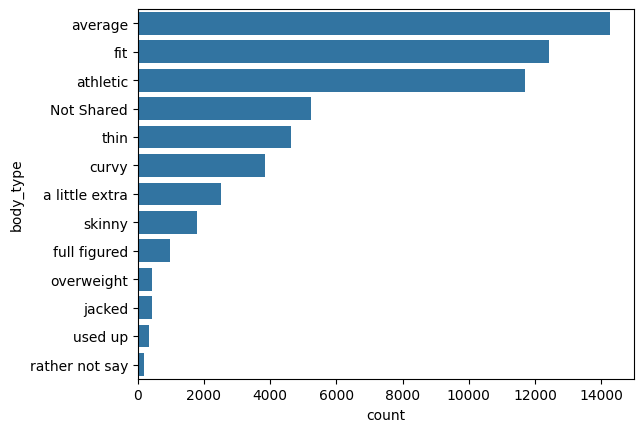

<Figure size 640x480 with 0 Axes>

In [56]:
counts = Individuals.body_type.value_counts().sort_values(ascending=False)
columns = Individuals.body_type.value_counts().sort_values(ascending=False).index
sns.barplot(x=counts, y=columns)
plt.show()
plt.clf()

> ### 1- Most of the user base  seems to fall under the average body_type.

> ### 2- Less people would `rather not say`, while `Not Shared` could either be people who did not submit the question on purpose to avoid it (my assumption) or missed it for any case. 

## How widespread are dangerous acts like `drugs` and smoking (`smokes`) in the dataset?
    Are they associated?

    The Null Hypothesis : There is not a significant association between the drug use and smoking.
    The Alternative Hypothesis: There is a significant association between the drug use and smoking.

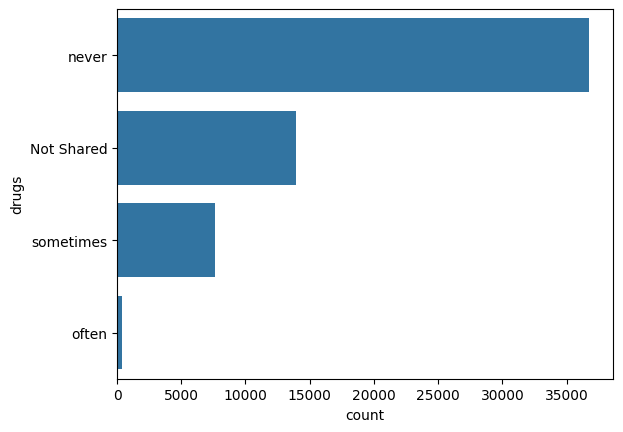

<Figure size 640x480 with 0 Axes>

In [57]:
counts = Individuals.drugs.value_counts().sort_values(ascending=False)
columns = Individuals.drugs.value_counts().sort_values(ascending=False).index
sns.barplot(x=counts, y=columns)
plt.show()
plt.clf()

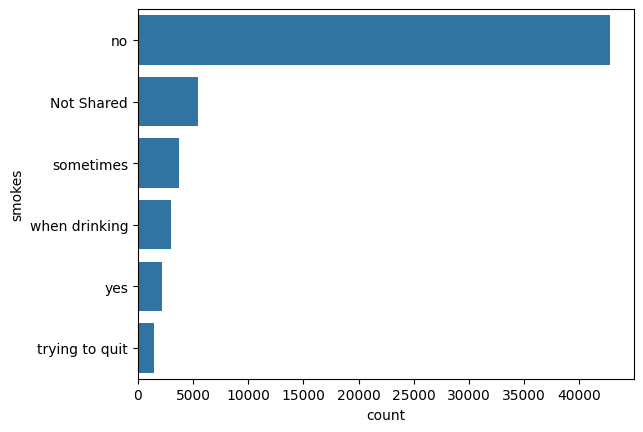

<Figure size 640x480 with 0 Axes>

In [58]:
counts = Individuals.smokes.value_counts().sort_values(ascending=False)
columns = Individuals.smokes.value_counts().sort_values(ascending=False).index
sns.barplot(x=counts, y=columns)
plt.show()
plt.clf()

> ### Most of the users never used drugs.

> ### Most of the users do not smoke. 

### To test their association, since they are both categorical as well we would follow the same hypothesis test used in the diet and body_type association test (Chi-square). 

In [59]:
cross_tab_d_smokes, chi2, pval = chi_square(Individuals, "drugs", "smokes")

print(F"The probabilty value : {pval}, and chi-square statistic : {chi2}")

The probabilty value : 0.0, and chi-square statistic : 8544.877824253797


### The pval < 0.05 (and the chi-square statstic is high as well) which leads to the rejection of the Null Hypothesis and supporting that the association between smoking and drug use is significant.

In [60]:
cross_tab_d_smokes_nsr, chi2, pval = chi_square(Individuals, "drugs", "smokes",False)

print(F"The probabilty value : {pval}, and chi-square statistic : {chi2}")

The probabilty value : 0.0, and chi-square statistic : 5946.7241458776225


> ### When including "Not Shared" responses, the association was highly significant (χ² = 8544.87, p = 0.0).
> ### When excluding "Not Shared", the association remained highly significant (χ² = 5946.72, p = 0.0).
> ### These results indicate a strong association between diet and body type, whether or not 'Not Shared' responses are included. The larger chi-square value when including 'Not Shared' suggests that this group may reflect non-random behavior, possibly influenced by conscious decisions or privacy preferences.

## How does the education levels vary across the dataset?
    Does it vary with age? 
    Does it have anything to do with income ? (association)

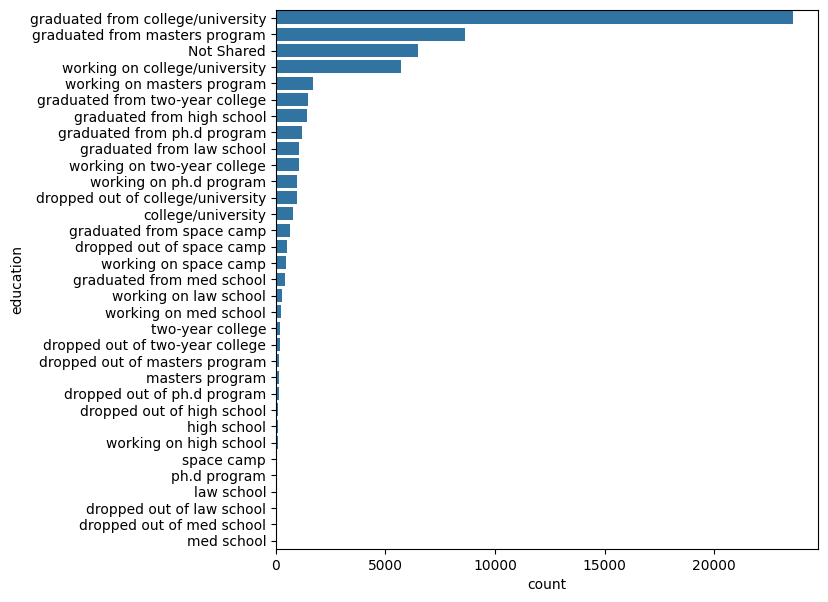

education
graduated from college/university    23575
graduated from masters program        8643
Not Shared                            6505
working on college/university         5705
working on masters program            1680
graduated from two-year college       1478
graduated from high school            1402
graduated from ph.d program           1198
graduated from law school             1076
working on two-year college           1069
working on ph.d program                981
dropped out of college/university      957
college/university                     782
graduated from space camp              640
dropped out of space camp              520
working on space camp                  440
graduated from med school              436
working on law school                  269
working on med school                  212
two-year college                       207
dropped out of two-year college        180
dropped out of masters program         134
masters program                        130
d

<Figure size 640x480 with 0 Axes>

In [61]:
counts = Individuals.education.value_counts().sort_values(ascending=False)
columns = Individuals.education.value_counts().sort_values(ascending=False).index
plt.figure(figsize = (7,7))
sns.barplot(x=counts, y=columns)
plt.show()
plt.clf()

print(counts)

> ### 1- Many situations/education levels are present. Combining some into a bigger category is an option but I will keep them in order to inspect the differences as intended on a deeper level (e.g. drop outs of a PHD is different from drop outs from high-school and combining them into drop outs could affect the accuracy of the outcome).

> ### 2- Most of the users have `graduatued from college/university`, while the lowest amount `dropped out of med school`.

## How does education vary with age?

I will try looking at a box plot to inspect how median ages (the exact middle line in the box plot) look at/between each level.

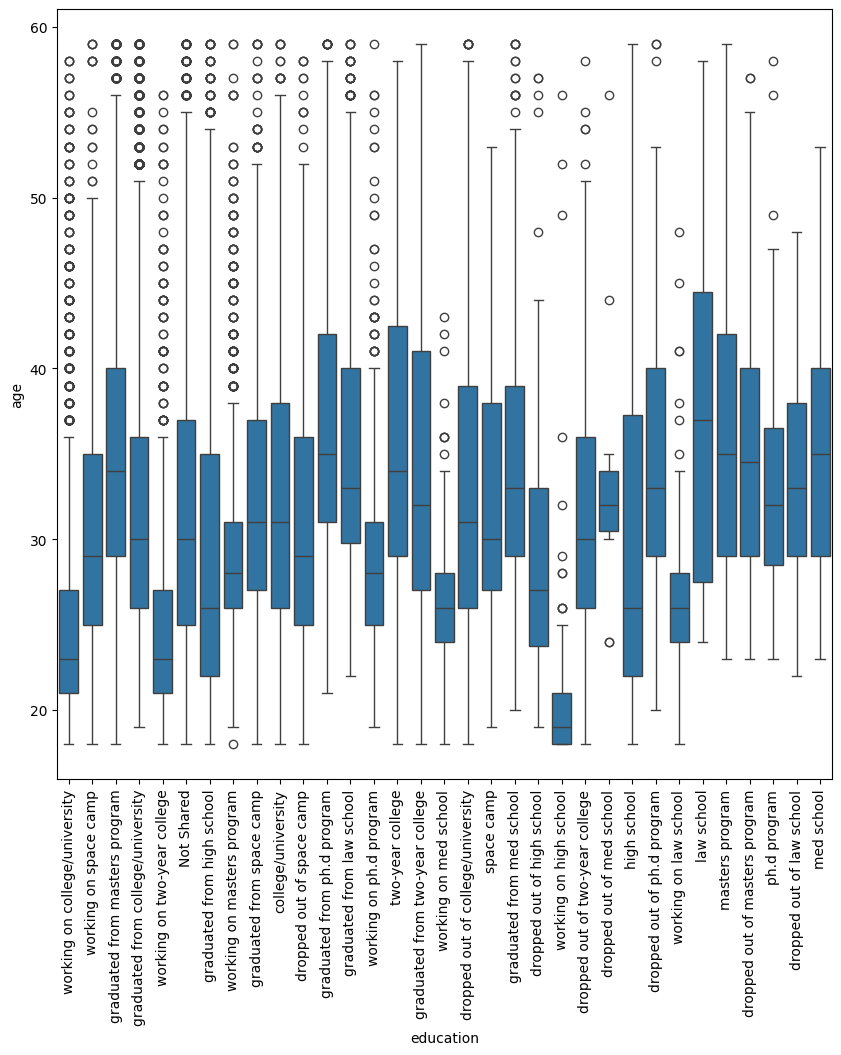

<Figure size 640x480 with 0 Axes>

In [62]:
plt.figure(figsize = (10,10))
sns.boxplot(x="education",y="age",data = Individuals)
plt.xticks(rotation = 90)
plt.show()
plt.clf()

> ### 1- As we have many levels it is understandble that the plot would be jam-packed, and since `age` reflects the current age of the user while education reflects their highest education level achieved, we could hand-pick cases like `graduated from college/university`, `graduated from masters program`, and `med school`.

> ### 2- The typical age of those who graduated from estimated to be 30 years old is much less than both other cases that are higher which I assume to be spent studying for the degree before actively engaging in the site.

> ### 3- Many of the levels have overlapping regions of the InterQuantileRange (IQR) (the upper bound, which is the 75th percentile, of the blue box in the plot and the lower bound, which is the 25th percentile of the data), essentialy meaning they have similar values. You can inspect cases like those who `dropped out of ph.d program` and those who finished `med school`. You can also inspect those who are working on masters and on their phd as well.

## Does education affect income values according to my dataset?

    The Null Hypothesis : Education levels do not affect income values.
    The Alternative Hypothesis: Education levels affect income values.


In [63]:
cross_tab_d_ed_income, chi2, pval = chi_square(Individuals, "education", "income_category")

print(F"The probabilty value : {pval}, and chi-square statistic : {chi2}")

The probabilty value : 0.0, and chi-square statistic : 5962.165447349185


In [64]:
cross_tab_d_ed_income_nsr, chi2, pval = chi_square(Individuals, "education", "income_category", False)

print(F"The probabilty value : {pval}, and chi-square statistic : {chi2}")

The probabilty value : 0.0, and chi-square statistic : 3287.7694949288793


> ### When including "Not Shared" responses, the association was highly significant (χ² = 5962.16, p = 0.0).
> ### When excluding "Not Shared", the association remained highly significant (χ² = 3287.76, p = 0.0).
> ### These results indicate a strong association between diet and body type, whether or not 'Not Shared' responses are included. The larger chi-square value when including 'Not Shared' suggests that this group may reflect non-random behavior, possibly influenced by conscious decisions or privacy preferences.

## What variety of Jobs are available within the userbase?
    What are recurrent jobs in the high income range and in the low income range?

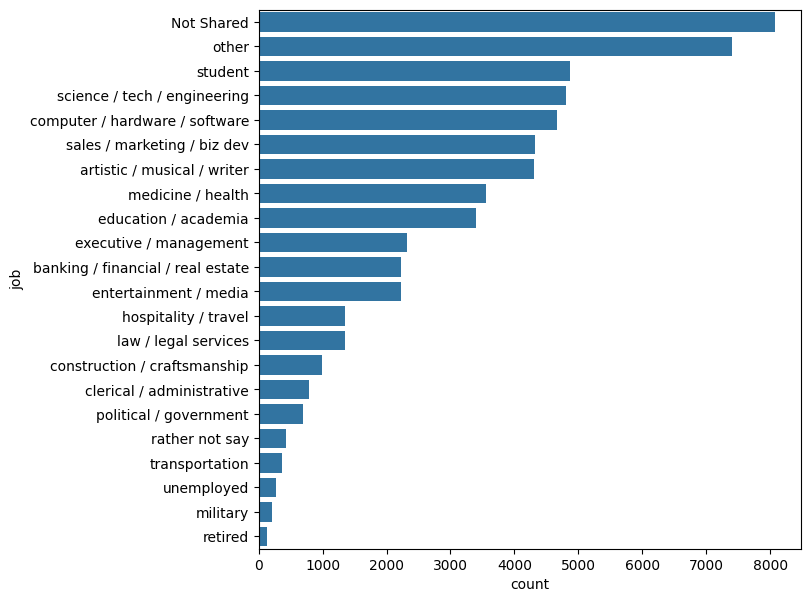

<Figure size 640x480 with 0 Axes>

In [65]:
counts = Individuals.job.value_counts().sort_values(ascending=False)
columns = Individuals.job.value_counts().sort_values(ascending=False).index
plt.figure(figsize = (7,7))
sns.barplot(x=counts, y=columns)
plt.show()
plt.clf()

> ### Most of the people decided to keep there profession private on the platform, while a very low count can be seen for retired people.

## Question: What are the recurrent jobs, other than being not shared, that are seen in the high income range and in the low income range?

In [66]:
cross_tab_jobs_income = pd.crosstab(Individuals.job,Individuals.income_category)
cross_tab_jobs_income

income_category,$0-$50k,$100k-$500k,$500k+,$50k-$100k,Not Shared
job,,,,,
Not Shared,131,86,44,78,7742
artistic / musical / writer,560,89,91,271,3300
banking / financial / real estate,55,156,13,136,1874
clerical / administrative,151,2,3,45,588
computer / hardware / software,154,529,29,435,3515
construction / craftsmanship,133,36,14,162,644
education / academia,348,39,29,291,2697
entertainment / media,184,87,21,161,1775
executive / management,70,292,26,154,1785


In [67]:
selected_columns = cross_tab_jobs_income[['$0-$50k']]

sorted_columns = selected_columns.sort_values(by=['$0-$50k'],ascending=False)

sorted_columns["%"] = selected_columns['$0-$50k'].apply(lambda x: x/(selected_columns.sum(axis=0)))

sorted_columns.iloc[:7]

income_category,$0-$50k,%
job,,
other,950,0.192308
student,898,0.181781
artistic / musical / writer,560,0.113360
education / academia,348,0.070445
sales / marketing / biz dev,316,0.063968
medicine / health,231,0.046761
hospitality / travel,216,0.043725


> ### The lowest income range is occupied by other jobs (non-mainstream ones), students, and (`artistic / musical / writer`) occupations amounting to 48% of the entire jobs.

In [68]:
selected_columns = cross_tab_jobs_income[['$50k-$100k']]

sorted_columns = selected_columns.sort_values(by=['$50k-$100k'],ascending=False)

sorted_columns["%"] = selected_columns['$50k-$100k'].apply(lambda x: x/(selected_columns.sum(axis=0)))

sorted_columns.iloc[:7]

income_category,$50k-$100k,%
job,,
computer / hardware / software,435,0.127044
other,373,0.108937
science / tech / engineering,361,0.105432
sales / marketing / biz dev,314,0.091706
education / academia,291,0.084988
artistic / musical / writer,271,0.079147
medicine / health,228,0.066589


In [69]:
selected_columns = cross_tab_jobs_income[['$100k-$500k']]

sorted_columns = selected_columns.sort_values(by=['$100k-$500k'],ascending=False)

sorted_columns["%"] = selected_columns['$100k-$500k'].apply(lambda x: x/(selected_columns.sum(axis=0)))

sorted_columns.iloc[:7]

income_category,$100k-$500k,%
job,,
computer / hardware / software,529,0.226068
science / tech / engineering,412,0.176068
executive / management,292,0.124786
sales / marketing / biz dev,205,0.087607
banking / financial / real estate,156,0.066667
medicine / health,128,0.054701
other,127,0.054274


> ### Both ranges showcase the variabiltiy and prominence of IT related jobs (`computer hardware and software` +  `science / tech / engineering`). Taking up 23% and 40% of entire job pool for both ranges respectively.

In [70]:
selected_columns = cross_tab_jobs_income[['$500k+']]

sorted_columns = selected_columns.sort_values(by=['$500k+'],ascending=False)

sorted_columns["%"] = selected_columns['$500k+'].apply(lambda x: x/(selected_columns.sum(axis=0)))

sorted_columns.iloc[:7]

income_category,$500k+,%
job,,
artistic / musical / writer,91,0.161348
other,62,0.109929
student,55,0.097518
Not Shared,44,0.078014
medicine / health,32,0.056738
science / tech / engineering,30,0.053191
computer / hardware / software,29,0.051418


> ### Inspecting the data, it is obvious that the discrepancy in the `artistic / musical / writer` occupation is wide as it took 10% of the lower income range previously while taking up almost 15% of the highest range here. `Students` and `other` occupations take up a high portion of the existing pool as well.

## What are the most prominent locations that the users reside in? 

In [71]:
Individuals.location.unique()

array(['south san francisco, california', 'oakland, california',
       'san francisco, california', 'berkeley, california',
       'belvedere tiburon, california', 'san mateo, california',
       'daly city, california', 'san leandro, california',
       'atherton, california', 'san rafael, california',
       'walnut creek, california', 'menlo park, california',
       'belmont, california', 'san jose, california',
       'palo alto, california', 'emeryville, california',
       'el granada, california', 'castro valley, california',
       'fairfax, california', 'mountain view, california',
       'burlingame, california', 'martinez, california',
       'pleasant hill, california', 'hayward, california',
       'alameda, california', 'vallejo, california',
       'benicia, california', 'el cerrito, california',
       'mill valley, california', 'richmond, california',
       'redwood city, california', 'el sobrante, california',
       'stanford, california', 'san pablo, california',

> ### We could split the location feature into two (`city` and `state`).

In [72]:
Individuals['city'] = Individuals.location.apply(lambda x: x.split(',')[0])
Individuals['state'] = Individuals.location.apply(lambda x: x.split(',')[-1].strip())
Individuals.drop("location",axis=1,inplace=True)

In [73]:
Individuals.tail() # You can look at the back end of the data set (tail) as well (like head())

,age,body_type,diet,drinks,drugs,education,height,job,last_online,offspring,pets,sex,smokes,speaks,income_category,city,state
59941,59,Not Shared,Not Shared,socially,never,graduated from college/university,62.0,sales / marketing / biz dev,2012-06-12-21-47,has kids,has dogs,f,no,english,Not Shared,oakland,california
59942,24,fit,mostly anything,often,sometimes,working on college/university,72.0,entertainment / media,2012-06-29-11-01,doesn&rsquo;t have kids,likes dogs and likes cats,m,no,english (fluently),Not Shared,san francisco,california
59943,42,average,mostly anything,not at all,never,graduated from masters program,71.0,construction / craftsmanship,2012-06-27-23-37,doesn&rsquo;t have kids,Not Shared,m,no,english (fluently),$100k-$500k,south san francisco,california
59944,27,athletic,mostly anything,socially,often,working on college/university,73.0,medicine / health,2012-06-23-13-01,"doesn&rsquo;t have kids, but wants them",likes dogs and likes cats,m,trying to quit,"english (fluently), spanish (poorly), chinese ...",Not Shared,san francisco,california
59945,39,average,Not Shared,socially,Not Shared,graduated from masters program,68.0,medicine / health,2012-06-29-00-42,Not Shared,likes dogs and likes cats,m,sometimes,english,Not Shared,san francisco,california


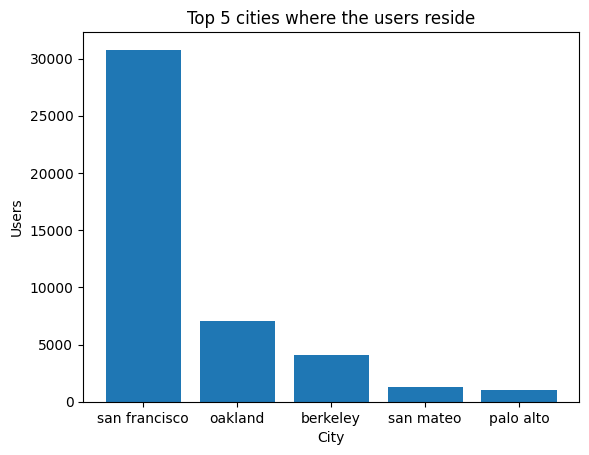

<Figure size 640x480 with 0 Axes>

In [74]:
values = Individuals.city.value_counts().iloc[:5]
cities = Individuals.city.value_counts().iloc[:5].index

plt.bar(cities,values)
plt.xlabel("City")
plt.ylabel("Users")
plt.title("Top 5 cities where the users reside")
plt.show()
plt.clf()

> ### Most of the users reside in San Francisco

state
california       58668
new york            17
illinois             8
massachusetts        5
texas                4
Name: count, dtype: int64


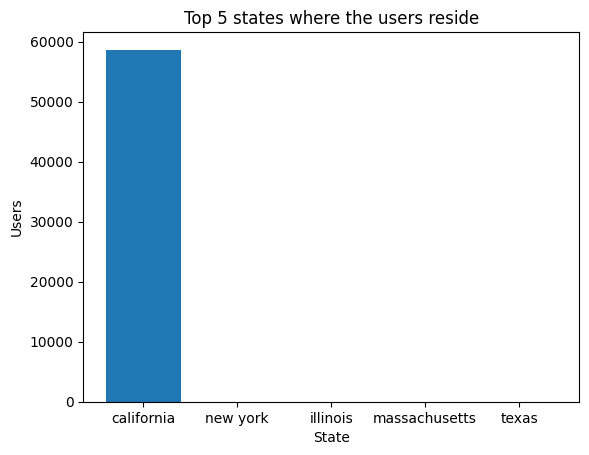

<Figure size 640x480 with 0 Axes>

In [75]:
values = Individuals.state.value_counts().iloc[:5]
states = Individuals.state.value_counts().iloc[:5].index

print(values)

plt.bar(states,values)
plt.xlabel("State")
plt.ylabel("Users")
plt.title("Top 5 states where the users reside")
plt.show()
plt.clf()

> ### Most of the users reside in California, which may result in a geographically skewed dataset.

## How does the activity look like using `last_online`?

In [76]:
Individuals["date_last_online"] = Individuals.last_online.apply(lambda x: x[:10])
Individuals["date_last_online"] = pd.to_datetime(Individuals["date_last_online"])
Individuals.head()

,age,body_type,diet,drinks,drugs,education,height,job,last_online,offspring,pets,sex,smokes,speaks,income_category,city,state,date_last_online
0,22,a little extra,strictly anything,socially,never,working on college/university,75.0,transportation,2012-06-28-20-30,"doesn&rsquo;t have kids, but might want them",likes dogs and likes cats,m,sometimes,english,Not Shared,south san francisco,california,2012-06-28
1,35,average,mostly other,often,sometimes,working on space camp,70.0,hospitality / travel,2012-06-29-21-41,"doesn&rsquo;t have kids, but might want them",likes dogs and likes cats,m,no,"english (fluently), spanish (poorly), french (...",$50k-$100k,oakland,california,2012-06-29
2,38,thin,anything,socially,Not Shared,graduated from masters program,68.0,Not Shared,2012-06-27-09-10,Not Shared,has cats,m,no,"english, french, c++",Not Shared,san francisco,california,2012-06-27
3,23,thin,vegetarian,socially,Not Shared,working on college/university,71.0,student,2012-06-28-14-22,doesn&rsquo;t want kids,likes cats,m,no,"english, german (poorly)",$0-$50k,berkeley,california,2012-06-28
4,29,athletic,Not Shared,socially,never,graduated from college/university,66.0,artistic / musical / writer,2012-06-27-21-26,Not Shared,likes dogs and likes cats,m,no,english,Not Shared,san francisco,california,2012-06-27


In [77]:
counts_across_dates = Individuals.groupby("date_last_online").last_online.count().sort_index()
dates = Individuals.groupby("date_last_online").last_online.count().index

print(dates)

DatetimeIndex(['2011-06-27', '2011-06-28', '2011-06-29', '2011-06-30',
               '2011-07-01', '2011-07-02', '2011-07-03', '2011-07-04',
               '2011-07-05', '2011-07-06',
               ...
               '2012-06-22', '2012-06-23', '2012-06-24', '2012-06-25',
               '2012-06-26', '2012-06-27', '2012-06-28', '2012-06-29',
               '2012-06-30', '2012-07-01'],
              dtype='datetime64[ns]', name='date_last_online', length=371, freq=None)


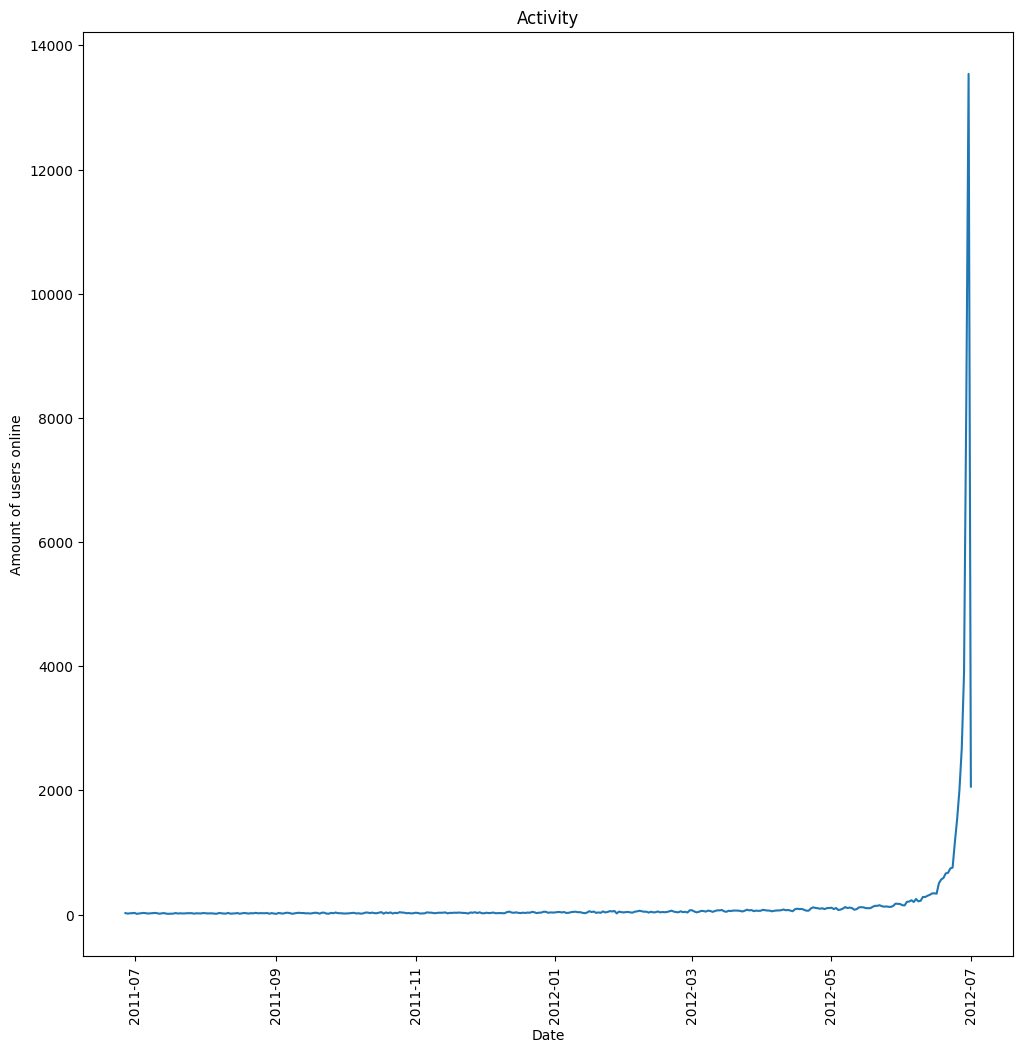

<Figure size 640x480 with 0 Axes>

In [78]:
plt.figure(figsize = (12,12))
plt.plot(dates,counts_across_dates)
plt.xticks(rotation = 90)
plt.xlabel("Date")
plt.ylabel("Amount of users online")
plt.title("Activity")
plt.show()
plt.clf()

> ### It looks like the usage has been recorded for about a year. It rose slowly since the starting date (2011-06-27) but exploded around June of the year after, then dipped again. 

## Does having kids affect having pets and vice versa?

    Null Hypothesis: Having kids affects having pets

    Alternative Hypothesis: Having kids does not affect having pets

In [79]:
Individuals.offspring.unique()

array(['doesn&rsquo;t have kids, but might want them', 'Not Shared',
       'doesn&rsquo;t want kids',
       'doesn&rsquo;t have kids, but wants them',
       'doesn&rsquo;t have kids', 'wants kids', 'has a kid', 'has kids',
       'doesn&rsquo;t have kids, and doesn&rsquo;t want any',
       'has kids, but doesn&rsquo;t want more',
       'has a kid, but doesn&rsquo;t want more',
       'has a kid, and wants more', 'has kids, and might want more',
       'might want kids', 'has a kid, and might want more',
       'has kids, and wants more'], dtype=object)

In [80]:
Individuals.offspring = Individuals.offspring.apply(lambda x: x.replace("doesn&rsquo;t","doesn't")) 

In [81]:
Individuals.offspring.unique()

array(["doesn't have kids, but might want them", 'Not Shared',
       "doesn't want kids", "doesn't have kids, but wants them",
       "doesn't have kids", 'wants kids', 'has a kid', 'has kids',
       "doesn't have kids, and doesn't want any",
       "has kids, but doesn't want more",
       "has a kid, but doesn't want more", 'has a kid, and wants more',
       'has kids, and might want more', 'might want kids',
       'has a kid, and might want more', 'has kids, and wants more'],
      dtype=object)

In [82]:
def simplify_children(val):
    if 'has a kid' in val or 'has kids' in val:
        return 'has kids'
    elif 'doesn\'t have kids' in val:
        return 'no kids'
    elif 'wants kids' in val or 'might want kids' in val:
        return 'wants kids'
    elif 'doesn’t want kids' in val:
        return 'doesn’t want kids'
    else:
        return val

Individuals['offspring_simplified'] = Individuals['offspring'].apply(simplify_children)

# Add binary flags
Individuals['has_kids'] = Individuals['offspring_simplified'].apply(lambda x: 1 if x == 'has kids' else 0)
Individuals['wants_kids'] = Individuals['offspring_simplified'].apply(lambda x: 1 if x == 'wants kids' else 0)


In [83]:
Individuals[['offspring_simplified','has_kids','wants_kids']].head(10)

,offspring_simplified,has_kids,wants_kids
0,no kids,0,0
1,no kids,0,0
2,Not Shared,0,0
3,doesn't want kids,0,0
4,Not Shared,0,0
5,no kids,0,0
6,Not Shared,0,0
7,no kids,0,0
8,no kids,0,0
9,Not Shared,0,0


In [84]:
Individuals.pets.unique()

array(['likes dogs and likes cats', 'has cats', 'likes cats',
       'Not Shared', 'has dogs and likes cats', 'likes dogs and has cats',
       'likes dogs and dislikes cats', 'has dogs',
       'has dogs and dislikes cats', 'likes dogs',
       'has dogs and has cats', 'dislikes dogs and has cats',
       'dislikes dogs and dislikes cats', 'dislikes cats',
       'dislikes dogs and likes cats', 'dislikes dogs'], dtype=object)

In [85]:
def simplify_pets(val):
    if 'likes dogs' in val and 'likes cats' in val:
        return 'likes both'
    elif 'dislikes dogs' in val and 'dislikes cats' in val:
        return 'dislikes both'
    elif 'likes dogs' in val:
        return 'likes dogs only'
    elif 'likes cats' in val:
        return 'likes cats only'
    elif 'dislikes dogs' in val:
        return 'dislikes dogs only'
    elif 'dislikes cats' in val:
        return 'dislikes cats only'
    elif 'has dogs' in val or 'has cats' in val:
        return 'has pets'
    else:
        return val

# Apply simplification
Individuals['pets_simplified'] = Individuals['pets'].apply(simplify_pets)

# Add binary flags
Individuals['likes_both'] = Individuals['pets_simplified'].apply(lambda x: 1 if x == 'likes both' else 0)
Individuals['dislikes_both'] = Individuals['pets_simplified'].apply(lambda x: 1 if x == 'dislikes both' else 0)
Individuals['likes_dogs'] = Individuals['pets_simplified'].apply(lambda x: 1 if 'likes dogs' in x or x == 'likes both' else 0)
Individuals['likes_cats'] = Individuals['pets_simplified'].apply(lambda x: 1 if 'likes cats' in x or x == 'likes both' else 0)

In [86]:
Individuals[['pets_simplified','likes_both','dislikes_both','likes_dogs','likes_cats']].head(10)

,pets_simplified,likes_both,dislikes_both,likes_dogs,likes_cats
0,likes both,1,0,1,1
1,likes both,1,0,1,1
2,has pets,0,0,0,0
3,likes cats only,0,0,0,1
4,likes both,1,0,1,1
5,likes cats only,0,0,0,1
6,likes both,1,0,1,1
7,likes both,1,0,1,1
8,likes both,1,0,1,1
9,likes both,1,0,1,1


In [87]:
cross_tab_offspring_pets, chi2, pval = chi_square(Individuals,"offspring_simplified","pets_simplified",include_not_shared = True)
cross_tab_d_body_type, chi2, pval = chi_square(Individuals,"diet","body_type")
print(F"The probabilty value : {pval}, and chi-square statistic : {chi2}")

cross_tab_offspring_pets_nsr, chi2, pval = chi_square(Individuals,"offspring_simplified","pets_simplified",include_not_shared = False)
cross_tab_d_body_type, chi2, pval = chi_square(Individuals,"diet","body_type")
print(F"The probabilty value : {pval}, and chi-square statistic : {chi2}")

The probabilty value : 0.0, and chi-square statistic : 3513.983260954026
The probabilty value : 0.0, and chi-square statistic : 3513.983260954026


In [88]:
cross_tab_offspring_pets

pets_simplified,Not Shared,has pets,likes both,likes cats only,likes dogs only
offspring_simplified,,,,,
Not Shared,13710,3621,9348,2092,6409
doesn't want kids,542,378,984,313,609
has kids,1385,906,988,316,725
no kids,3824,1846,5517,1232,3607
wants kids,93,54,120,37,102


>### Both `pval < 0.05` and the high chi-square statistic support that there is a high association between both features.

## How do languages look like in our dataset?

In [89]:
Individuals.speaks.unique()

array(['english', 'english (fluently), spanish (poorly), french (poorly)',
       'english, french, c++', ...,
       'english (fluently), hindi (poorly), french (poorly), tamil (okay), spanish (poorly)',
       'english (fluently), french (poorly), japanese (poorly), latin (poorly)',
       'english (fluently), french, farsi'], dtype=object)

### Someone really put C++, which is a programming language. I will keep them as they will help in recommending users with similar taste.

In [90]:
Individuals["languages_spoken"] = Individuals.speaks.apply(lambda x: len(x.split(",")) if x != "Not Shared" else 0)

In [91]:
# A language score based on fluency could be added as well
def calculate_language_score(speaks_str):
    if speaks_str == "Not Shared":
        return 0
    language_weights = {"fluently": 2, "okay": 1, "poor": 0.5," ":1}
    return sum(language_weights.get(lang.split("(")[-1][:-1], 0) for lang in speaks_str.split(","))

Individuals['language_score'] = Individuals['speaks'].apply(calculate_language_score)
    

In [92]:
Individuals[['speaks','languages_spoken','language_score']].head(10)

,speaks,languages_spoken,language_score
0,english,1,0
1,"english (fluently), spanish (poorly), french (...",3,2
2,"english, french, c++",3,0
3,"english, german (poorly)",2,0
4,english,1,0
5,"english (fluently), chinese (okay)",2,3
6,english,1,0
7,"english, spanish (okay)",2,1
8,english,1,0
9,english (fluently),1,2


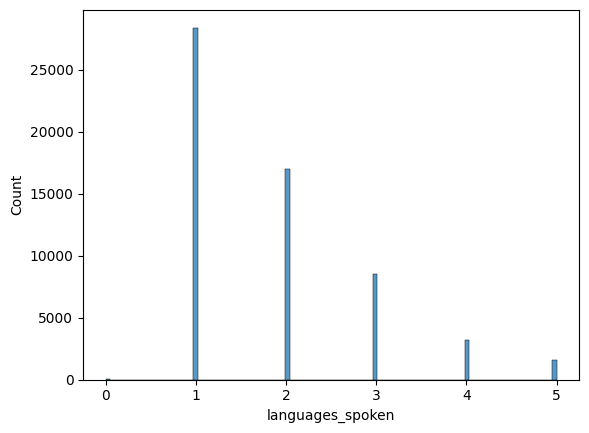

<Figure size 640x480 with 0 Axes>

In [93]:
sns.histplot(Individuals.languages_spoken)
plt.show()
plt.clf()

> ### Most of the users speak one language only.

> ### Regarding the `languages_spoken` feature, it can be used later on as a way to test for the similarity between users.  

### Next: The `speaks` feature is valuable and have thought of on one hot encoding it into many columns but that would be expensive. Another thing that could be done is to make them into a sparse vector where the language available is indicated by 1.

In [94]:
from sklearn.preprocessing import MultiLabelBinarizer

import re


Individuals['speaks'] = Individuals['speaks'].apply(lambda x: ' '.join(re.sub(r'\s?\(.*?\)', '', x).split(',')))


Individuals['languages'] = Individuals['speaks'].apply(lambda x: [lang.strip() for lang in x.split()])

Individuals['languages'] = Individuals['languages'].apply(lambda x: x if x else ['Not Shared'])


mlb = MultiLabelBinarizer()


language_features = pd.DataFrame(mlb.fit_transform(Individuals['languages']), columns=mlb.classes_)

if 'Not' in language_features.columns:
    language_features = language_features.drop('Not', axis=1)

if 'Shared' in language_features.columns:
    language_features = language_features.drop('Shared', axis=1)

Individuals = Individuals.join(language_features)

    # Display the first few rows of the dataframe
Individuals.head()

,age,body_type,diet,drinks,drugs,education,height,job,last_online,offspring,...,tagalog,tamil,thai,tibetan,turkish,ukrainian,urdu,vietnamese,welsh,yiddish
0,22,a little extra,strictly anything,socially,never,working on college/university,75.0,transportation,2012-06-28-20-30,"doesn't have kids, but might want them",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,35,average,mostly other,often,sometimes,working on space camp,70.0,hospitality / travel,2012-06-29-21-41,"doesn't have kids, but might want them",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38,thin,anything,socially,Not Shared,graduated from masters program,68.0,Not Shared,2012-06-27-09-10,Not Shared,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23,thin,vegetarian,socially,Not Shared,working on college/university,71.0,student,2012-06-28-14-22,doesn't want kids,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29,athletic,Not Shared,socially,never,graduated from college/university,66.0,artistic / musical / writer,2012-06-27-21-26,Not Shared,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---------------------------------------------------------------------------------------
## Feature Engineering 

    This part is essential before entering the realm of machine learning models. As they say garbage in, garbage out. 

    Before addressing machine learning stage, I will encode the categorical variables, and use `Filter Methods` that allow you to inspect and potentially filter for features you may want to use. I will be using the variancethreshold to filter out features with no variabilty, and mutual information to check for the dependence of predictors with the target variable (smokes). 

In [95]:
Individuals.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'height',
       'job', 'last_online', 'offspring',
       ...
       'tagalog', 'tamil', 'thai', 'tibetan', 'turkish', 'ukrainian', 'urdu',
       'vietnamese', 'welsh', 'yiddish'],
      dtype='object', length=107)

In [96]:
# We can visually inspect the categorical features
Individuals.select_dtypes(include=["object", "datetime"]).head()

,body_type,diet,drinks,drugs,education,job,last_online,offspring,pets,sex,smokes,speaks,income_category,city,state,date_last_online,offspring_simplified,pets_simplified,languages
0,a little extra,strictly anything,socially,never,working on college/university,transportation,2012-06-28-20-30,"doesn't have kids, but might want them",likes dogs and likes cats,m,sometimes,english,Not Shared,south san francisco,california,2012-06-28,no kids,likes both,[english]
1,average,mostly other,often,sometimes,working on space camp,hospitality / travel,2012-06-29-21-41,"doesn't have kids, but might want them",likes dogs and likes cats,m,no,english spanish french,$50k-$100k,oakland,california,2012-06-29,no kids,likes both,"[english, spanish, french]"
2,thin,anything,socially,Not Shared,graduated from masters program,Not Shared,2012-06-27-09-10,Not Shared,has cats,m,no,english french c++,Not Shared,san francisco,california,2012-06-27,Not Shared,has pets,"[english, french, c++]"
3,thin,vegetarian,socially,Not Shared,working on college/university,student,2012-06-28-14-22,doesn't want kids,likes cats,m,no,english german,$0-$50k,berkeley,california,2012-06-28,doesn't want kids,likes cats only,"[english, german]"
4,athletic,Not Shared,socially,never,graduated from college/university,artistic / musical / writer,2012-06-27-21-26,Not Shared,likes dogs and likes cats,m,no,english,Not Shared,san francisco,california,2012-06-27,Not Shared,likes both,[english]


In [97]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# This class assigns unkown labels in any future cases to -1. Could be helpful for inference.
class CustomLabelEncoder(LabelEncoder):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def transform(self, y):
        # Transform the input to a list of known categories and -1 for unknown ones
        # Convert y to a list of labels (string type is recommended to avoid ambiguity)
        y = np.asarray(y)
        transformed = np.array([self.classes_.tolist().index(x) if x in self.classes_ else -1 for x in y])
        return transformed

    def fit(self, y):
        # Fit the encoder just like the default LabelEncoder, but keep track of the classes
        super().fit(y)
        return self



# Categorical Encoding

Individuals_c = Individuals.copy()

# I will drop some features like dates, and other features that have been simplified or encoded prior in there own sections
Individuals_c = Individuals_c.drop(columns=['date_last_online', 'last_online', 'offspring', 'pets' ,'speaks','languages'])

# These columns will have their values converted into labels for each category
label_columns = ['body_type', 'diet', 'drinks', 'drugs', 'education', 'job', 'sex', 'smokes' ,'city' ,'state', 'offspring_simplified', 'pets_simplified']


label_encoders = {}
# Apply Label Encoding to the listed columns
for column in label_columns:
    label_encoder = CustomLabelEncoder()
    Individuals_c[column] = label_encoder.fit_transform(Individuals_c[column].astype(str))  
    label_encoders[column] = label_encoder  # Will be stored for each column
    # print(label_encoder.classes_) just there in case we want to view the classes captured


# Ordinal Encoding for the 'income_category' column as it has an inherent order
ordinal_encoder = OrdinalEncoder(categories= [['Not Shared', '$0-$50k', '$50k-$100k', '$100k-$500k', '$500k+']])  

# Apply Ordinal Encoding to 'income_category'
Individuals_c['income_category'] = ordinal_encoder.fit_transform(Individuals_c[['income_category']])

In [98]:
# Variance Threshold and Mutual Information

from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0)  # 0 is default

print(selector.fit_transform(Individuals_c))

num_cols = list(Individuals_c.columns[selector.get_support(indices=True)])

print(num_cols)

[[22.  1. 11. ...  0.  0.  0.]
 [35.  3.  7. ...  0.  0.  0.]
 [38. 11.  1. ...  0.  0.  0.]
 ...
 [42.  3.  4. ... nan nan nan]
 [27.  2.  4. ... nan nan nan]
 [39.  3.  0. ... nan nan nan]]
['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'height', 'job', 'sex', 'smokes', 'income_category', 'city', 'state', 'offspring_simplified', 'has_kids', 'wants_kids', 'pets_simplified', 'likes_both', 'likes_dogs', 'likes_cats', 'languages_spoken', 'language_score', 'afrikaans', 'albanian', 'ancient', 'arabic', 'armenian', 'basque', 'belarusan', 'bengali', 'breton', 'bulgarian', 'c++', 'catalan', 'cebuano', 'chechen', 'chinese', 'croatian', 'czech', 'danish', 'dutch', 'english', 'esperanto', 'estonian', 'farsi', 'finnish', 'french', 'frisian', 'georgian', 'german', 'greek', 'gujarati', 'hawaiian', 'hebrew', 'hindi', 'hungarian', 'icelandic', 'ilongo', 'indonesian', 'irish', 'italian', 'japanese', 'khmer', 'korean', 'language', 'latin', 'latvian', 'lisp', 'lithuanian', 'malay', 'maori'

> ### All features pass.

--------------------------------------------------------------------------------
### Extra: This segment showcases how to measure the predictive power using mutual information but this requires a known target variable. I tried `smokes`, which is categorical.

In [99]:
from sklearn.feature_selection import mutual_info_classif # Used in classification tasks

features_s = Individuals_c[['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'height', 'job', 'sex', 'income_category', 'city', 'state', 'offspring_simplified', 
                            'has_kids', 'wants_kids', 'pets_simplified', 'likes_both', 'likes_dogs', 'likes_cats', 'languages_spoken', 'language_score']]
label_s = Individuals_c[['smokes']]
label_s = np.ravel(label_s)

mi = mutual_info_classif(features_s, label_s , discrete_features=[1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20],random_state=42) 

print(mi)

[2.09141062e-02 1.47082933e-02 9.05128480e-03 7.63516022e-02
 5.76558891e-02 4.78065633e-02 1.87624007e-03 3.06632014e-02
 1.14364625e-03 1.23642343e-02 1.15916765e-02 9.58195939e-04
 7.33744691e-03 1.50911335e-03 8.94359879e-05 1.18473497e-02
 3.03998109e-03 5.42684975e-03 4.70366400e-03 2.95709298e-03
 6.79601990e-03]


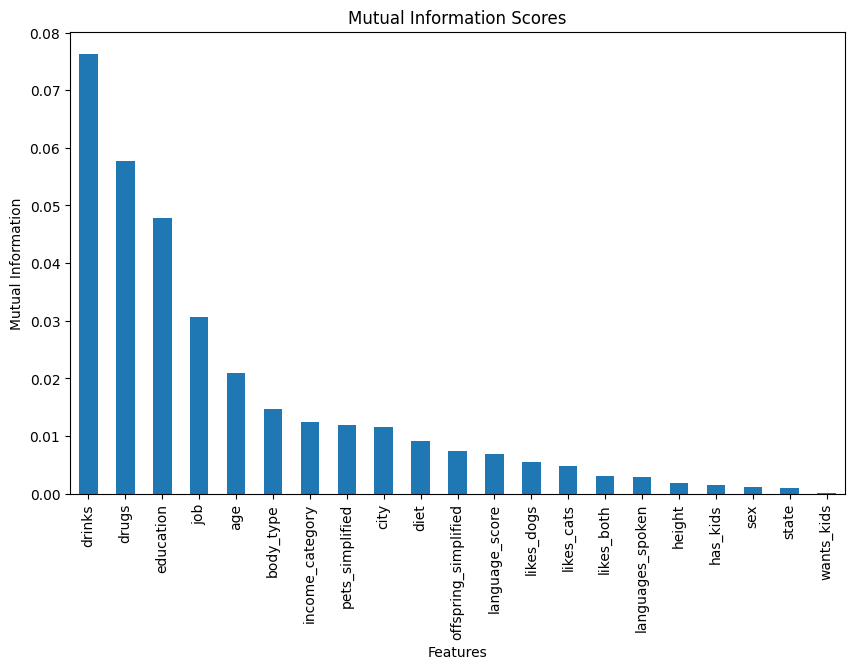

In [100]:
sorted_mi = pd.Series(mi,index = features_s.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sorted_mi.plot(kind="bar")
plt.title('Mutual Information Scores')
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.show()

---------------------------------------------
### Apply Column Transformer to scale numerical features with quantitive qualities 

In [101]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

numeric_features = ['age','height']


ct = ColumnTransformer([('scale', StandardScaler(), numeric_features)],remainder="passthrough")

columns = Individuals_c.columns
Individuals_c_scaled = ct.fit_transform(Individuals_c) 

In [102]:
Individuals_c_scaled = pd.DataFrame(Individuals_c_scaled,columns = columns)

In [108]:
len(Individuals_c_scaled)

58758

In [103]:
Individuals_c_scaled.head()

,age,body_type,diet,drinks,drugs,education,height,job,sex,smokes,...,tagalog,tamil,thai,tibetan,turkish,ukrainian,urdu,vietnamese,welsh,yiddish
0,-1.149898,1.708413,1.0,11.0,5.0,1.0,25.0,20.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.386672,0.427917,3.0,7.0,3.0,3.0,31.0,9.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.741265,-0.084281,11.0,1.0,5.0,0.0,13.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.031701,0.684017,11.0,18.0,5.0,0.0,25.0,19.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.322514,-0.596480,2.0,0.0,5.0,1.0,10.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


> #### Notice that we have 101 columns, the shear amount of features could be an obstacle to the machine learning model, especially in terms of computation.

### Here is where principle component analysis comes in. It is away to project our data from 101 dimensions into a lower dimension, without losing important information. We want to pretain as much of the variance as possible.

    The process begins with calculating the covariance matrix to understand the relationships between features. This matrix undergoes matrix factorization to find two smaller matrices, which reveal the principal components (eigenvectors) — vectors that maintain their direction despite transformations. These eigenvectors are associated with eigenvalues that indicate the amount of variance captured by each principal component.

    The eigenvectors are crucial in projecting the dataset into a new, lower-dimensional space, which is key to dimensionality reduction.

In [105]:
Individuals_c_scaled.isna().sum()

age              0
body_type        0
diet             0
drinks           0
drugs            0
              ... 
ukrainian     1171
urdu          1171
vietnamese    1171
welsh         1171
yiddish       1171
Length: 101, dtype: int64

In [109]:
# I will drop columns with nulls
Individuals_c_scaled_no_nulls = Individuals_c_scaled.dropna()

In [107]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(Individuals_c_scaled_no_nulls)

PCA()

In [110]:
components = pca.components_
components = pd.DataFrame(components).transpose()
components.index =  Individuals_c_scaled_no_nulls.columns
components

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
age,-0.000276,-0.024077,0.003800,-0.011688,-0.005706,0.001987,0.075694,0.033107,0.100108,-0.265944,...,-0.000014,-0.000071,-0.000017,-0.000135,0.000005,-0.000002,0.000035,0.000000e+00,0.000000e+00,-0.000000e+00
body_type,0.000281,-0.002166,0.001582,0.001252,-0.016326,-0.000640,-0.052669,-0.029625,-0.037040,0.287622,...,-0.000012,0.000064,-0.000064,-0.000065,-0.000174,-0.000053,0.000043,-3.804621e-18,-2.503128e-15,-3.273161e-16
diet,0.000269,0.009243,-0.006132,0.097992,0.994486,-0.008998,-0.013616,-0.006651,0.000864,-0.015416,...,-0.000030,0.000019,0.000016,0.000041,-0.000004,0.000026,-0.000032,1.032913e-18,8.019440e-17,1.303348e-16
drinks,-0.002255,0.053269,0.003745,0.990439,-0.099499,-0.053412,-0.039867,-0.015971,-0.029911,-0.018078,...,0.000010,-0.000003,0.000021,0.000007,0.000009,0.000004,-0.000005,6.389364e-20,-3.223085e-16,-7.424723e-18
drugs,0.000391,0.017491,0.009234,0.005814,0.003276,0.090803,0.260052,0.724737,-0.577567,-0.229386,...,0.000028,0.000083,-0.000017,0.000104,0.000009,-0.000030,-0.000030,-1.020352e-18,4.665155e-16,-7.947739e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ukrainian,-0.000003,0.000013,0.000046,0.000015,0.000010,-0.000193,-0.000008,-0.000127,-0.000107,-0.000178,...,0.005635,0.006229,0.003955,0.002975,-0.000103,0.001362,-0.000132,7.068321e-17,-2.473232e-12,2.621688e-14
urdu,-0.000002,0.000010,0.000019,-0.000031,-0.000033,-0.000044,0.000049,-0.000002,0.000072,0.000135,...,0.004338,0.005839,-0.006031,0.000464,0.003042,-0.000074,0.004455,5.531999e-17,7.844543e-14,1.813827e-14
vietnamese,0.000012,0.000023,-0.000035,0.000009,-0.000070,0.000024,0.000100,-0.000265,0.000226,-0.000126,...,-0.000380,0.000684,-0.000678,0.000098,-0.000268,0.000058,-0.002202,1.063873e-17,-6.471364e-13,1.543904e-15
welsh,0.000001,-0.000022,-0.000003,-0.000015,0.000009,0.000010,-0.000047,0.000111,0.000007,0.000021,...,0.010061,0.026757,-0.030107,0.000165,-0.049856,0.003334,0.024432,1.646669e-15,9.671958e-13,2.195085e-13


In [112]:
var_ratio = pca.explained_variance_ratio_
var_ratio = pd.DataFrame(var_ratio).transpose()
var_ratio

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.93627,0.029596,0.015673,0.008007,0.003557,0.001489,0.000971,0.000723,0.000706,0.000545,...,9.052657e-08,8.414229e-08,8.390816e-08,7.875540e-08,7.331171e-08,5.568452e-08,5.454753e-08,2.573669e-23,0.0,0.0


> ### The first 3 components account for around 98% of the variance, thus choosing the amount of princple components to be 3. 

> ### I will also project the data into that lower dimension using .fit_transform()

In [115]:
Pca = PCA(n_components = 3)

Individuals_pcomponents = Pca.fit_transform(Individuals_c_scaled_no_nulls)

Individuals_pcomponents = pd.DataFrame(Individuals_pcomponents)

Individuals_pcomponents.columns = ['PC1', 'PC2', 'PC3']

Individuals_pcomponents.head()

,PC1,PC2,PC3
0,46.894876,17.059755,3.829966
1,-10.114228,16.255978,-8.631416
2,27.185753,-3.640609,-8.369166
3,-109.095926,14.841948,3.134377
4,27.219791,-5.916989,-6.022377


-------------------------------------------------------------------
## After projecting our data, we will head into the recommender system


### We will start by grouping our users into groups, to help bring closer users together. This task is an unsupervised learning task as we do not have labeled data, and will need to find groupings after understanding the inherent structure of our data.

    This is done via many algorithms but I will utilize the KMeans algorithm that assigns centroids (the centers to each gourp) and finds all datapoints closer to one. This process is iterative until the centroid placement stabilizes.


#### The first thing is to understand how many centroids to choose, essentially the amount of clusters present. We want to choose the optimal number without getting too high in the amounts and to make sure that all our groups are as clumped up as possible at the same time. 

#### This process is done using the `Elbow method`.

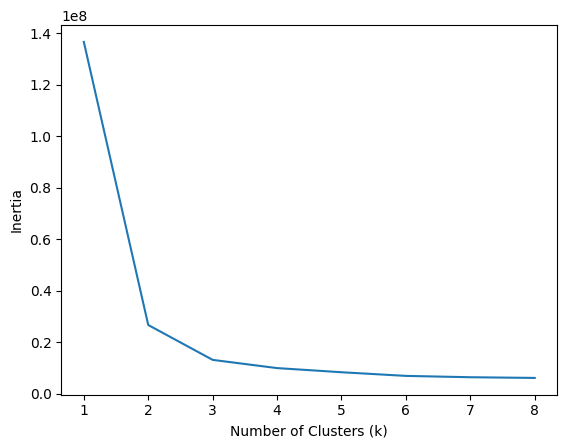

In [118]:
from sklearn.cluster import KMeans

num_clusters = list(range(1,9))
inertias = []

for n in num_clusters:
  model = KMeans(n_clusters = n)
  model.fit(Individuals_pcomponents)
  inertias.append(model.inertia_)


plt.plot(num_clusters, inertias)

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.show()

> #### The scree plot showcases that the optimal number to choose is 3 (at the elbow of the plot).


### We will next utilize that to fit and predict the groupings of each user.

In [119]:
grouping_model = KMeans(n_clusters = 3)

grouping_model.fit(Individuals_pcomponents)

labels = grouping_model.predict(Individuals_pcomponents)

array([1, 1, 1, ..., 1, 1, 1])

In [122]:
set_labels = set(labels)
print(set_labels)

{0, 1, 2}


In [125]:
df_labels = pd.DataFrame(labels,columns = ["label"])
df_labels.value_counts()

label
1        46110
0         6463
2         5014
Name: count, dtype: int64

Text(0, 0.5, 'PC2')

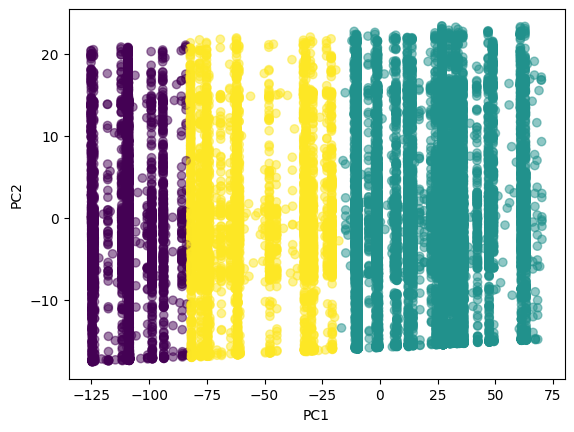

In [234]:
plt.scatter(Individuals_pcomponents.PC1, Individuals_pcomponents.PC2, c=labels, alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

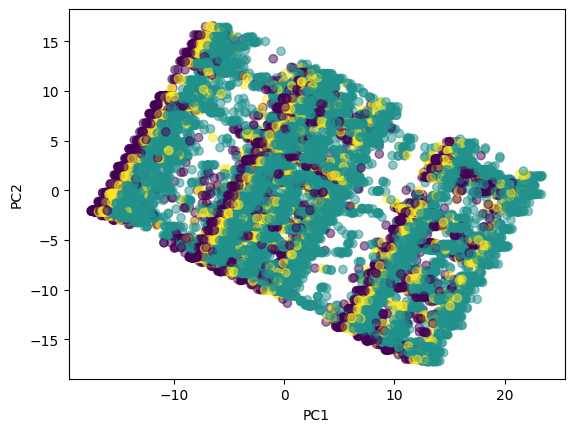

In [233]:
plt.scatter(Individuals_pcomponents.PC2, Individuals_pcomponents.PC3, c=labels, alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')

### I will add the grouping as an additional feature

In [130]:
Individuals_pcomponents["group"] = labels

In [175]:
Individuals_pcomponents.group = Individuals_pcomponents.group.astype("str")

In [176]:
Individuals_pcomponents.head()

,PC1,PC2,PC3,group
0,46.894876,17.059755,3.829966,1
1,-10.114228,16.255978,-8.631416,1
2,27.185753,-3.640609,-8.369166,1
3,-109.095926,14.841948,3.134377,0
4,27.219791,-5.916989,-6.022377,1


-----------------------------------------------------------------------
## Recommender system 

### The system will be straightforward, a user will be given a choice to explore outside their group (a way to find more surprising, unexpected recommendations to users outside there group set). If not then the amount of users is filtered to make the search faster and will return in either options the most similar users utilizing cosine similarity.


### Cosine Similarity Formula

The formula for cosine similarity between two vectors **A** and **B** is:

$$
\text{Cosine Similarity} = \cos(\theta) = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\|}
$$

Where:
- $$ \mathbf{A} \cdot \mathbf{B} $$ is the dot product of vectors **A** and **B**.
- $$ \|\mathbf{A}\|  and  \|\mathbf{B}\| $$ are the magnitudes (or norms) of **A** and **B**, respectively.
- $$ \cos(\theta) $$ represents the cosine of the angle between the two vectors.


We are basically treating our features [PC1, PC2, PC3, group] as a vector and finding other "vectors" (users) that point in the same direction/angle, thus being the most similar. Other similarity metrics utilize distances between points like the Euclidean, and Manhattan distances that aim to find the closest points.

In [227]:
def cosine_similarity(v1,v2):
    dot_product = np.dot(v1,v2)
    mag_product = np.linalg.norm(v1) * np.linalg.norm(v2)
    return dot_product/mag_product
    
def Recommender_system(df, user_id, original_dataframe = None ,explore_outside_the_box = False, k_users = 5):

    user_vector = df.iloc[user_id, :-1].values
    group = df.group.iloc[user_id]
    
    if not explore_outside_the_box:
        print(group)
        filtered_group = df[df.group == group]
    else:
        filtered_group = df
        
    similarities = []
    for index, vector in filtered_group.iterrows():
        if index != user_id: # Just to avoid comparing the same user
            other_user = vector.iloc[:-1].values # Taking other components but the group
            similarities.append((index,cosine_similarity(user_vector,other_user)))
    sorted_similarities = sorted(similarities,key = lambda x:x[1],reverse=True) #The key here specifies the column we want to sort by, which in case is the similarity

    top_k = sorted_similarities[:k_users]
    indices = [user[0] for user in top_k]
    similarities = [user[1] for user in top_k]

    if original_dataframe is not None:

        groups = pd.DataFrame(df.group)
        columns = original_dataframe.columns
        observations = []
        for idx in indices:
            observations.append(original_dataframe.iloc[idx].values)
        original_features = pd.DataFrame(observations,columns = columns)
        original_features = original_features.join(groups)
 
        actual_user = original_dataframe.iloc[user_id].to_frame().T
        actual_user["group"] = group
        
        return top_k, indices, similarities, actual_user, original_features 
            
        
    return top_k, indices, similarities

In [228]:
recommended_users, idx, similarities = Recommender_system(Individuals_pcomponents, user_id=30332, explore_outside_the_box=True, k_users=7)
print(f"Top recommended users: {recommended_users}" )
print(f"Indices: {idx}")
print(f"Similarities: {similarities}")

Top recommended users: [(36232, 0.9999944117702293), (42512, 0.9999938665264203), (38308, 0.9999863406091594), (41280, 0.999974487482095), (23748, 0.9999666925448772), (44354, 0.9999654419540139), (55149, 0.9999463496299821)]
Indices: [36232, 42512, 38308, 41280, 23748, 44354, 55149]
Similarities: [0.9999944117702293, 0.9999938665264203, 0.9999863406091594, 0.999974487482095, 0.9999666925448772, 0.9999654419540139, 0.9999463496299821]


### We can view the users principle components at each index, the assigned groups could help us understand to some degree why they are similar, but when applying PCA (or dimensionality reduction techniques) we lose the ability to interpret why the results occured. 

### I added the ability to view the same index from the unscaled dataframe in order to get a better grasp.

In [229]:
recommended_users, idx, similarities, user, original_df = Recommender_system(Individuals_pcomponents, user_id=30332, original_dataframe = Individuals,explore_outside_the_box=True, k_users=7)
print(f"Top recommended users: {recommended_users}" )
print(f"Indices: {idx}")
print(f"Similarities: {similarities}")

Top recommended users: [(36232, 0.9999944117702293), (42512, 0.9999938665264203), (38308, 0.9999863406091594), (41280, 0.999974487482095), (23748, 0.9999666925448772), (44354, 0.9999654419540139), (55149, 0.9999463496299821)]
Indices: [36232, 42512, 38308, 41280, 23748, 44354, 55149]
Similarities: [0.9999944117702293, 0.9999938665264203, 0.9999863406091594, 0.999974487482095, 0.9999666925448772, 0.9999654419540139, 0.9999463496299821]


In [230]:
user

,age,body_type,diet,drinks,drugs,education,height,job,last_online,offspring,...,tamil,thai,tibetan,turkish,ukrainian,urdu,vietnamese,welsh,yiddish,group
30931,25,fit,vegetarian,socially,never,Not Shared,62.0,student,2012-06-30-17-03,"doesn't have kids, but might want them",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [232]:
user.job

30931    student
Name: job, dtype: object

In [235]:
user.languages

30931    [english, chinese]
Name: languages, dtype: object

In [231]:
original_df

,age,body_type,diet,drinks,drugs,education,height,job,last_online,offspring,...,tamil,thai,tibetan,turkish,ukrainian,urdu,vietnamese,welsh,yiddish,group
0,18,thin,strictly vegetarian,rarely,never,Not Shared,64.0,student,2012-03-06-18-20,Not Shared,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,25,athletic,vegetarian,socially,never,Not Shared,67.0,student,2012-06-30-21-23,Not Shared,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,29,athletic,vegetarian,often,Not Shared,Not Shared,64.0,student,2012-06-05-21-55,Not Shared,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,20,thin,strictly other,socially,never,Not Shared,73.0,student,2012-06-30-18-57,Not Shared,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,27,fit,strictly vegetarian,often,never,Not Shared,66.0,student,2012-06-02-23-40,Not Shared,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,26,curvy,strictly vegetarian,socially,never,Not Shared,69.0,student,2012-07-01-00-58,doesn't have kids,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,24,a little extra,Not Shared,socially,sometimes,dropped out of college/university,69.0,science / tech / engineering,2012-06-10-14-57,Not Shared,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [236]:
original_df["languages"]

0                [english, french]
1       [english, spanish, arabic]
2               [english, spanish]
3              [english, japanese]
4                        [english]
5               [english, spanish]
6    [english, c++, lisp, spanish]
Name: languages, dtype: object

## Many of the attributes align:
    1- The user is from a similar age range
    2- All users have somewhats similar body type
    3- All of them can speak English
    4- Similar height range but the fourth user
    5- Similar Job but the last user
    .... etc

### One recommendation has actually come from a different group which is interesting (the fourth user or user at index 3). They have different hieghts, body_types, and diets, but you can inspect that they have similar attributes like being lastly online on the same day (was not used in the grouping model), students, and speaking a common language between them.   

--------------------------------------------------------
# Conclusion

## This recommender system project effectively demonstrates how to create personalized recommendations based on user profiles. Using cosine similarity, the system compares various user features, such as age, body type, diet, and other habits, to suggest peers who share similar attributes. The approach leverages simple yet powerful data preprocessing techniques, allowing the system to handle categorical and missing data efficiently. By filtering recommendations based on group membership, the project ensures that users receive suggestions that align with their cultural or social contexts.

## However, there are several ways this project can be expanded to further enhance its capabilities and scalability:

## Model Enhancement:

> ### Incorporating Additional Models: Beyond cosine similarity, we can explore other models like collaborative filtering (both user-based and item-based) and content-based filtering to improve recommendation accuracy.

> ### Machine Learning Integration: Using machine learning algorithms such as decision trees, random forests, or even deep learning techniques could lead to more sophisticated recommendation systems, capturing more complex patterns in user preferences.

## Feature Engineering:

> ### Enriching User Profiles: To increase the depth of recommendations, more features could be added to the user profiles, such as location, hobbies, or specific interests.

> ### Textual Data Processing with NLP: If user profiles include textual data (e.g., user descriptions or feedback), we could apply NLP techniques like word embeddings (Word2Vec, GloVe) or transformer models (BERT) to analyze and use this text for generating more precise recommendations.

## Data Preprocessing Improvements:

> ### Advanced Imputation Methods: For handling missing data, advanced imputation techniques such as KNN imputation could be used to fill in missing values in a more intelligent way.

> ### Feature Scaling and Transformation: Normalizing or standardizing features before performing similarity calculations could improve the results, particularly for numerical data.

## Deployment:

> ### Web Application with FastAPI/Flask: The project can be extended into a fully deployable web application using FastAPI or Flask. This would allow users to interact with the system via a user-friendly interface and receive recommendations in real-time.

> ### User Interface: A frontend UI using frameworks like React or Vue can be developed to enhance user experience, making the recommendation system more accessible to a wider audience.

> ### Real-time Data Integration: Building a pipeline that updates recommendations in real-time as users add new data or modify their profiles could make the system more dynamic and responsive.

## NLP for Enhanced User Profiles:

> ### Textual Similarity and Clustering: NLP models could be used to process and compare user-written descriptions, enabling more nuanced recommendations based on textual similarity. Additionally, clustering users based on their descriptions could offer a better way to recommend similar peers.

## Scalability and Performance:

> ### Caching Recommendations: Implementing a caching mechanism to store previously computed recommendations can reduce the response time for users and improve system performance.


## By addressing these expansions, the project could evolve from a basic prototype to a robust, scalable, and real-time recommender system that could be applied in a variety of real-world contexts. These improvements would not only increase the accuracy and efficiency of recommendations but also expand the system's capabilities to handle more complex user data and preferences.

